In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import tifffile as tiff
import rasterio

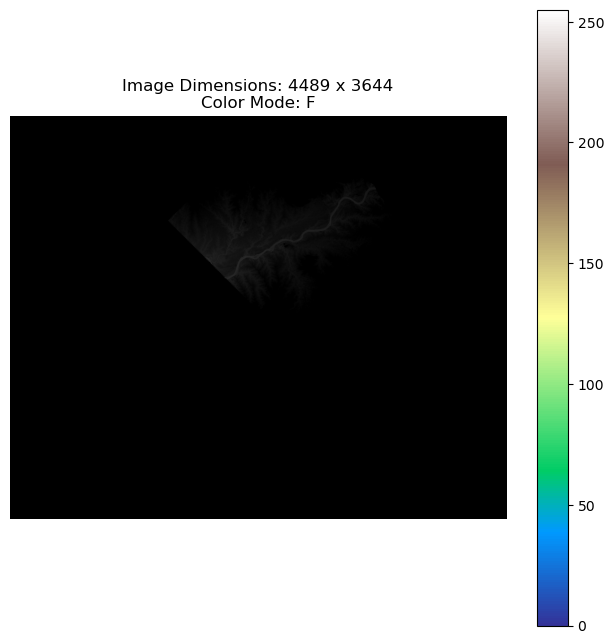

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the TIFF file
input_tiff_file = "Depth (01AUG2013 00 00 00).Terrain (1).output_SRTMGL1.tif"

with Image.open(input_tiff_file) as img:
    # Get basic information about the image
    width, height = img.size
    mode = img.mode
    
    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap='terrain')
    plt.title(f"Image Dimensions: {width} x {height}\nColor Mode: {mode}")
    plt.axis('off')
    
    # Show the color palette if the image is not in '1' mode (binary)
    if mode != '1':
        plt.colorbar()
    
    plt.show()


In [3]:
# Load the input TIFF file using rasterio
input_tiff_file = 'Depth (01AUG2013 00 00 00).Terrain (1).output_SRTMGL1.tif'
with rasterio.open(input_tiff_file) as src:
    image = src.read(1)  # Read the first (and likely only) band

# Define a threshold to identify water areas
threshold = 15  # Adjust this value as needed

# Apply the threshold to create a binary mask
binary_mask = (image >= threshold).astype(np.uint8)

# Get the metadata (including georeferencing info) from the input file
with rasterio.open(input_tiff_file) as src:
    profile = src.profile

# Save the binary mask as a new TIFF file with the same metadata
output_tiff_file = 'binary_river.tif'
with rasterio.open(output_tiff_file, 'w', **profile) as dst:
    dst.write(binary_mask, 1)

print("Binary TIFF file with georeferencing info saved as", output_tiff_file)


Binary TIFF file with georeferencing info saved as binary_river.tif


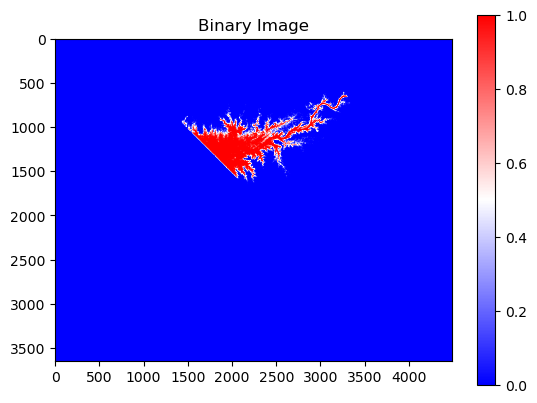

In [4]:
plt.imshow(binary_mask, cmap='bwr', vmin=0, vmax=1)
plt.colorbar()
plt.title("Binary Image")
plt.show()

In [8]:
import os
import numpy as np
import tifffile as tiff
import rasterio

# Specify the input and output folders
input_folder = '2012_DEM'
output_folder = 'dem_tif_binary'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define a threshold to identify water areas
threshold = 10 # Adjust this value as needed

# Get a list of all TIFF files in the input folder
tiff_files = [file for file in os.listdir(input_folder) if file.endswith('.tif')]

for tiff_file in tiff_files:
    # Load the input TIFF file using rasterio
    input_tiff_file = os.path.join(input_folder, tiff_file)
    with rasterio.open(input_tiff_file) as src:
        image = src.read(1)  # Read the first (and likely only) band

    # Apply the threshold to create a binary mask
    binary_mask = (image >= threshold).astype(np.uint8)

    # Get the metadata (including georeferencing info) from the input file
    with rasterio.open(input_tiff_file) as src:
        profile = src.profile

    # Generate the output binary TIFF filename
    output_tiff_file = os.path.join(output_folder, f'{os.path.splitext(tiff_file)[0]}_binary.tif')

    # Save the binary mask as a new TIFF file with the same metadata
    with rasterio.open(output_tiff_file, 'w', **profile) as dst:
        dst.write(binary_mask, 1)

    print(f"Binary TIFF file with georeferencing info saved as {output_tiff_file}")


Binary TIFF file with georeferencing info saved as dem_tif_binary/Depth (20AUG2012 00 00 00).Terrain.output_SRTMGL1_binary.tif
Binary TIFF file with georeferencing info saved as dem_tif_binary/Depth (03AUG2012 00 00 00).Terrain.output_SRTMGL1_binary.tif
Binary TIFF file with georeferencing info saved as dem_tif_binary/Depth (06AUG2012 00 00 00).Terrain.output_SRTMGL1_binary.tif
Binary TIFF file with georeferencing info saved as dem_tif_binary/Depth (25AUG2012 00 00 00).Terrain.output_SRTMGL1_binary.tif
Binary TIFF file with georeferencing info saved as dem_tif_binary/Depth (14AUG2012 00 00 00).Terrain.output_SRTMGL1_binary.tif
Binary TIFF file with georeferencing info saved as dem_tif_binary/Depth (09AUG2012 00 00 00).Terrain.output_SRTMGL1_binary.tif
Binary TIFF file with georeferencing info saved as dem_tif_binary/Depth (11AUG2012 00 00 00).Terrain.output_SRTMGL1_binary.tif
Binary TIFF file with georeferencing info saved as dem_tif_binary/Depth (17AUG2012 00 00 00).Terrain.output_SRT